<a href="https://colab.research.google.com/github/ydicsey/image-processing/blob/main/Rotate_the_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# for cos and sin
import math

Create an image consisting of a white square with a black background

In [ ]:
height = 25
width = 25

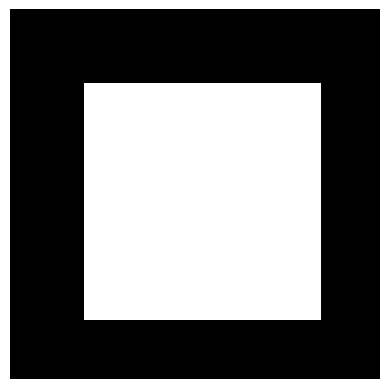

In [ ]:
image = np.zeros((height, width, 3), dtype=np.uint8)

square_size = 15
left = (width - square_size) // 2
top = (height - square_size) // 2
right = left + square_size
bottom = top + square_size
white = (255, 255, 255)
cv.rectangle(image, (left, top), (right, bottom), white, -1)

plt.axis('off')
plt.imshow(image)
plt.show()

Rotate the image by 30 degrees

In [ ]:
# 設定旋轉的角度
theta_in_degree = 30
# 轉換成弧度
theta_in_radians = math.radians(theta_in_degree)

sine = math.sin(theta_in_radians)
cosine = math.cos(theta_in_radians)

# 計算旋轉後的長寬
new_width = int(abs(height * cosine)+abs(width * sine))
new_height = int(abs(width * cosine)+abs(height * sine))

# 計算圖像中心點
center = (width / 2, height / 2)

# 計算旋轉後圖像中心點
new_center = (new_width / 2, new_height / 2)

# 創建旋轉矩陣
rotation_matrix = np.array([[cosine, -sine], [sine, cosine]])

 Use rotation with neighbor interpolation

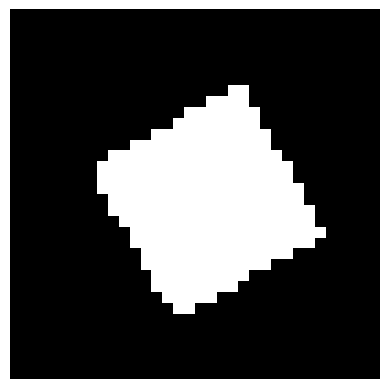

(34, 34, 3)

In [ ]:
# 創建新圖像
rotated_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

# 計算旋轉後的每個像素的位置和顏色
for i in range(new_height):
    for j in range(new_width):
        ori_x, ori_y = np.dot(rotation_matrix, np.array([j - new_center[0], i - new_center[1]]))

        # 使用最近的像素值填充新圖像
        ori_x = int(round(ori_x) + center[0])
        ori_y = int(round(ori_y) + center[1])
        if 0 <= ori_x < width and 0 <= ori_y < height:
            rotated_image[i, j] = image[ori_y, ori_x]

# 顯示旋轉後的圖像
plt.axis('off')
plt.imshow(rotated_image)
plt.show()
rotated_image.shape

rotation with bilinear interpolation

In [ ]:
from scipy.interpolate import RectBivariateSpline

# 生成x, y座標
y = np.arange(image.shape[0])
x = np.arange(image.shape[1])

fB = RectBivariateSpline(x, y, image[:,:,0])
fG = RectBivariateSpline(x, y, image[:,:,1])
fR = RectBivariateSpline(x, y, image[:,:,2])

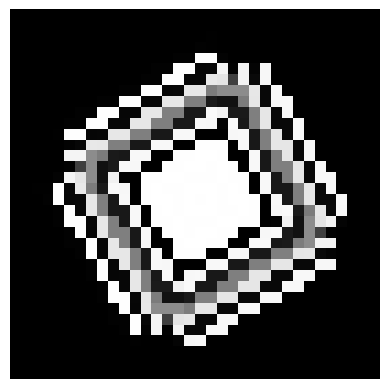

(34, 34, 3)

In [ ]:
# 創建新圖像
rotated_image_linear = np.zeros((new_height, new_width, 3), dtype=np.uint8)

# 計算旋轉後的每個像素的位置和顏色
for i in range(new_height):
    for j in range(new_width):
        ori_x, ori_y = np.dot(rotation_matrix, np.array([j - new_center[0], i - new_center[1]]))

        # 使用最近的像素值填充新圖像
        ori_x = (round(ori_x) + center[0])
        ori_y = (round(ori_y) + center[1])
        if 0 <= ori_x < width and 0 <= ori_y < height:
            rotated_image_linear[i, j, 0] = fB(ori_x, ori_y)
            rotated_image_linear[i, j, 1] = fG(ori_x, ori_y)
            rotated_image_linear[i, j, 2] = fR(ori_x, ori_y)

# 顯示旋轉後的圖像
plt.axis('off')
plt.imshow(rotated_image_linear)
plt.show()
rotated_image_linear.shape

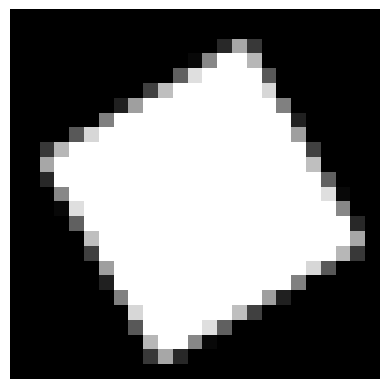

In [ ]:
M = cv.getRotationMatrix2D(center, 30, 1)
rotated_image = cv.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv.INTER_LINEAR)
plt.axis('off')
plt.imshow(rotated_image)
plt.show()

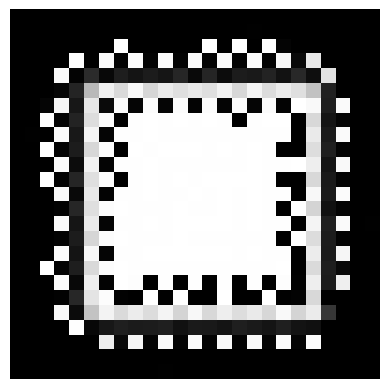

In [ ]:
import numpy as np
from scipy.interpolate import RectBivariateSpline
import cv2

# 读入图像
# image = cv2.imread('test.jpg')

# 设置旋转角度
angle = 30

# 计算图像中心点坐标和旋转矩阵
center = (image.shape[1] // 2, image.shape[0] // 2)
M = cv2.getRotationMatrix2D(center, angle, 1)

# 将图像旋转到目标角度
rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# 定义插值函数
interp_func = RectBivariateSpline(np.arange(rotated_image.shape[0]), np.arange(rotated_image.shape[1]), rotated_image[:,:,0])

# 计算插值
output = np.zeros_like(rotated_image)
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        # 对于每个像素位置，计算对应的原图像的位置
        x = center[0] + (j - center[0]) * np.cos(np.deg2rad(angle)) + (i - center[1]) * np.sin(np.deg2rad(angle))
        y = center[1] - (j - center[0]) * np.sin(np.deg2rad(angle)) + (i - center[1]) * np.cos(np.deg2rad(angle))

        # 判断原图像位置是否在图像范围内
        if x >= 0 and y >= 0 and x < image.shape[1] - 1 and y < image.shape[0] - 1:
            # 对于每个像素位置，使用双线性插值计算像素值
            output[i, j, 0] = interp_func(y, x)
            output[i, j, 1] = RectBivariateSpline(np.arange(rotated_image.shape[0]), np.arange(rotated_image.shape[1]), rotated_image[:,:,1])(y, x)
            output[i, j, 2] = RectBivariateSpline(np.arange(rotated_image.shape[0]), np.arange(rotated_image.shape[1]), rotated_image[:,:,2])(y, x)

# 显示结果
plt.axis('off')
plt.imshow(output)
plt.show()


In [ ]:
# from PIL import Image
# im = Image.fromarray(image)
# im = im.rotate(30, resample = Image.NEAREST, expand=True)

# plt.axis('off')
# plt.imshow(im)
# plt.show()

In [ ]:
# from PIL import Image
# import math

# # 讀取圖像
# # image = Image.open("image.jpg")
# image = Image.fromarray(image)

# # 旋轉角度，逆時針為正
# angle = -30

# # 旋轉圖像
# rotated_image = image.rotate(angle, expand=True)

# # 計算旋轉後的圖像大小
# width, height = rotated_image.size
# rad_angle = math.radians(angle)
# new_width = int(abs(width*math.cos(rad_angle))+abs(height*math.sin(rad_angle)))
# new_height = int(abs(width*math.sin(rad_angle))+abs(height*math.cos(rad_angle)))

# # 調整圖像大小以適應旋轉後的圖像
# resized_image = rotated_image.resize((new_width, new_height), Image.ANTIALIAS)

# # 顯示旋轉後的圖像
# resized_image.show()


rotate v2

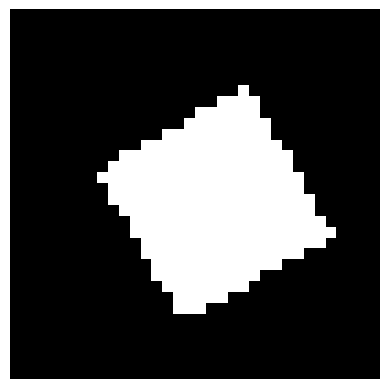

(34, 34, 3)

In [ ]:
# 創建新圖像
rotated_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

# 計算旋轉後的每個像素的位置和顏色
for i in range(new_height):
    for j in range(new_width):
        x = j - new_center[0]
        y = i - new_center[1]
        new_x = int(x * cosine - y * sine + center[0])
        new_y = int(x * sine + y * cosine + center[1])
        if 0 <= new_x < width and 0 <= new_y < height:
            rotated_image[i, j] = image[new_y, new_x]

# 顯示旋轉後的圖像
plt.axis('off')
plt.imshow(rotated_image)
plt.show()
rotated_image.shape
